In [112]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from WallWorld import WallWorld
from DqnAgentNewDims import DqnAgentNewDims, neural_network
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from tensorflow.keras.datasets import mnist

if __name__ == "__main__":

    # Config
    max_steps=500_000

    # WallWorld
    render_mode=None
    size=7
    agentSpawn = None
    maxSteps=200
    stepLoss=0
    chestSpawnCoordinates=np.array([[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6],
                                    [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6],
                                    [2, 0], [2, 1], [2, 2],         [2, 4], [2, 5], [2, 6]])
    wallCoordinates=      np.array([[3, 0], [3, 1], [3, 2],         [3, 4], [3, 5], [3, 6],])
    agentSpawnCoordinates=np.array([[4, 0],                                         [4, 6],
                                    [5, 0],                                         [5, 6],
                                    [6, 0],                                         [6, 6]])
    randomWalls=0
    redChestCoordinates=None
    greenChestCoordinates=None
    keyCoordinates=None
    randomredChests=1
    randomgreenChests=1
    randomkeys=0
    redChestReward=-1 # Don't change this
    greenChestReward=1 # Don't change this
    # Explaination:
    # terminated with 1 reward ---> green chest: 1
    # terminated with 0 reward ---> red chest:  -1
    # truncated                 --> no chest:    0
    
    # Agent
    batch_size=64
    lr=0.001
    gamma=0.95
    epsilon_start=1
    epsilon_min=0.05
    epsilon_decay=200_000 # 50_000 at 3000 episodes
    tau=0.0005 # Was 0.005
    replayBuffer=100_000

    env = WallWorld(render_mode=None,
                    size=size, agentSpawn=agentSpawn,
                    stepLoss=stepLoss, maxSteps=maxSteps,
                    wallCoordinates=wallCoordinates,
                    randomWalls=randomWalls,
                    redChestCoordinates=redChestCoordinates,
                    greenChestCoordinates=greenChestCoordinates,
                    keyCoordinates=keyCoordinates,
                    redChestReward=redChestReward,
                    greenChestReward=greenChestReward,
                    randomredChests=randomredChests,
                    randomgreenChests=randomgreenChests,
                    randomkeys=randomkeys,
                    agentSpawnCoordinates=agentSpawnCoordinates,
                    chestSpawnCoordinates=chestSpawnCoordinates,
                    newDims=True)
    observation, _ = env.reset()
    agent = DqnAgentNewDims(env.action_space, observation,
        batch_size=batch_size,
        lr=lr,
        gamma=gamma,
        epsilon_start=epsilon_start,
        epsilon_min=epsilon_min,
        epsilon_decay=epsilon_decay,
        tau=tau,
        replayBuffer=replayBuffer)
    
    maxSteps = 30 #????
    show_env = WallWorld(render_mode="human",
                    size=size, agentSpawn=agentSpawn,
                    stepLoss=stepLoss, maxSteps=maxSteps,
                    wallCoordinates=wallCoordinates,
                    randomWalls=randomWalls,
                    redChestCoordinates=redChestCoordinates,
                    greenChestCoordinates=greenChestCoordinates,
                    keyCoordinates=keyCoordinates,
                    redChestReward=redChestReward,
                    greenChestReward=greenChestReward,
                    randomredChests=randomredChests,
                    randomgreenChests=randomgreenChests,
                    randomkeys=randomkeys,
                    agentSpawnCoordinates=agentSpawnCoordinates,
                    chestSpawnCoordinates=chestSpawnCoordinates,
                    newDims=True)

    modelNames = ["r00_g10_1500k",
              "r01_g10_1500k",
              "r02_g10_1500k",
              "r03_g10_1500k",
              "r04_g10_1500k",
              "r05_g10_1500k",
              "r06_g10_1500k",
              "r07_g10_1500k",
              "r08_g10_1500k",
              "r09_g10_1500k",
              "r10_g00_1500k",
              "r10_g01_1500k",
              "r10_g02_1500k",
              "r10_g03_1500k",
              "r10_g04_1500k",
              "r10_g05_1500k",
              "r10_g06_1500k",
              "r10_g07_1500k",
              "r10_g08_1500k",
              "r10_g09_1500k",
              "r10_g10_1500k"]

In [113]:
#Mnist model


# a random numpy array with shape (3, 28, 28)
observation = np.random.rand(3, 28, 28).astype(np.float32)
action_space_n = 10

mnistModel = neural_network(
    action_space_n=action_space_n,
    observation=observation)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnistModel.parameters(), lr=0.001)

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0
y_train = y_train.astype(np.int64)

# Convert to shape: (N, 3, 28, 28)
x_train = np.expand_dims(x_train, axis=1)           # (N, 1, 28, 28)
x_train = np.repeat(x_train, 3, axis=1)              # (N, 3, 28, 28)

# Convert to torch tensors
x_train_tensor = torch.tensor(x_train)
y_train_tensor = torch.tensor(y_train)

# Define Dataset
class MNIST3ChannelDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

# Create DataLoader
train_dataset = MNIST3ChannelDataset(x_train_tensor, y_train_tensor)
dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)


"""
num_epochs = 10
mnistModel.train()

for epoch in range(num_epochs):
    for batch_obs, batch_labels in dataloader:
        # Forward pass
        outputs = mnistModel(batch_obs)
        loss = criterion(outputs, batch_labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

torch.save(mnistModel.state_dict(), "C:/Projects/public/XAI_Master/models/mnistModel.pth")
"""
"""Epoch 1/10, Loss: 0.0106
Epoch 2/10, Loss: 0.0040
Epoch 3/10, Loss: 0.6902
Epoch 4/10, Loss: 0.0007
Epoch 5/10, Loss: 0.0001
Epoch 6/10, Loss: 0.0003
Epoch 7/10, Loss: 0.0245
Epoch 8/10, Loss: 0.0050
Epoch 9/10, Loss: 0.0291
Epoch 10/10, Loss: 0.0000"""

print(mnistModel)

neural_network(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=25088, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


Model loaded: C:/Projects/public/XAI_Master/models/mnistModel.pth
Layer: 1
Action index: 4


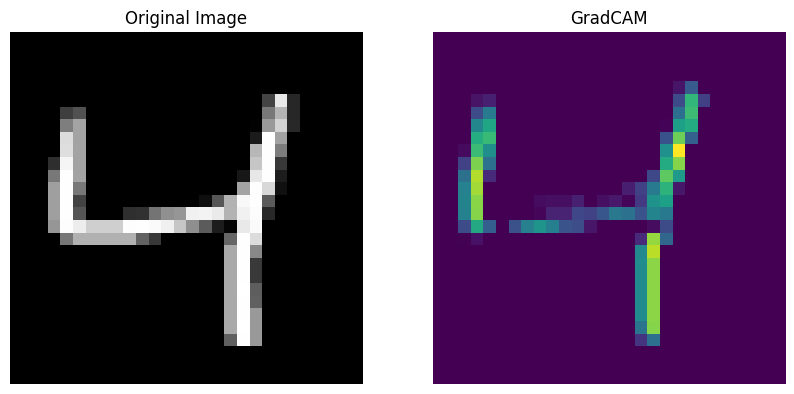

Layer: 2
Action index: 4


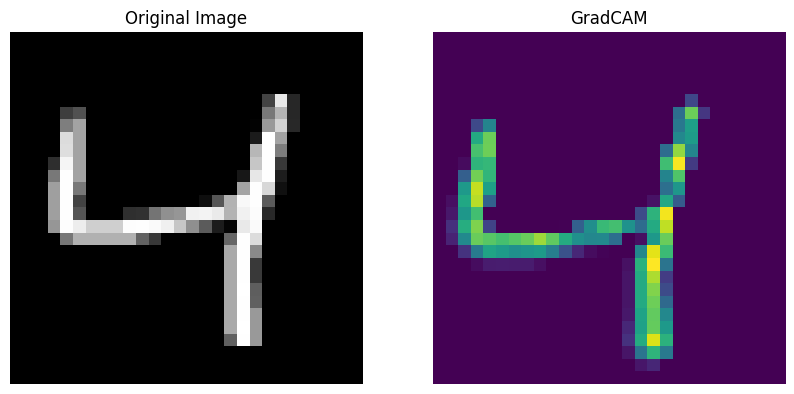

Layer: 3
Action index: 4


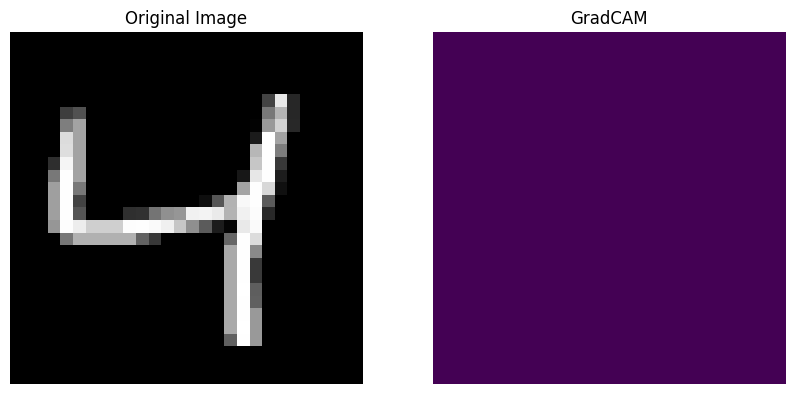

In [117]:

path = "C:/Projects/public/XAI_Master/models/mnistModel.pth"
mnistModel.load_state_dict(torch.load(path))
mnistModel.eval()
print(f"Model loaded: {path}")

dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

layers = (mnistModel.conv1, mnistModel.conv2, mnistModel.conv3)

for layer, counter in zip(layers, range(len(layers))):
    print(f"Layer: {counter+1}")

    state = dataloader.dataset[2][0].unsqueeze(0) # Change picture here
    actions = mnistModel(state)
    target_layer = mnistModel.conv3
    target_layer = layer
    action_idx = torch.argmax(actions, dim=1).item()
    targets = [ClassifierOutputTarget(action_idx)]
    print(f"Action index: {action_idx}")



    # Create a GradCAM object with the agent's policy network and target layer
    with GradCAM(model=mnistModel, target_layers=[target_layer]) as cam:
        # Generate the CAM
        grayscale_cam = cam(input_tensor=state, targets=targets)
        grayscale_cam = grayscale_cam[0, :]#only one image in the batch
        original_img = state[0].permute(1, 2, 0).cpu().numpy()

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img, interpolation='nearest')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(grayscale_cam, interpolation=None)
    plt.title("GradCAM")
    plt.axis('off')
    plt.show()




In [127]:
state_init, _ = env.reset()

Model loaded: C:/Projects/public/XAI_Master/models/y_r10_g03_3000k.pth
Layer: 1
Action: Up


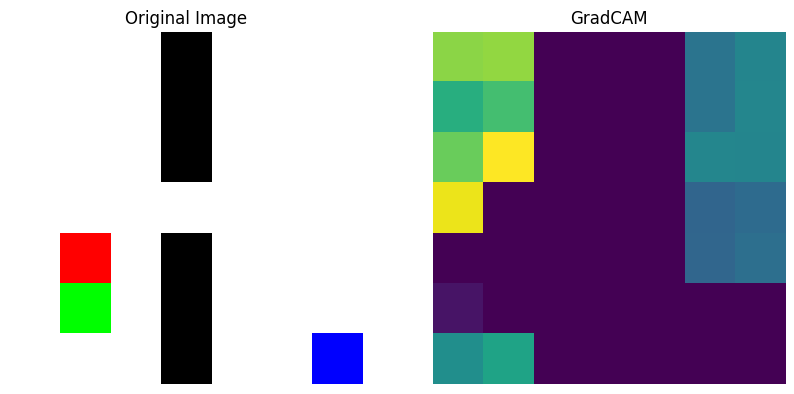

Layer: 2
Action: Up


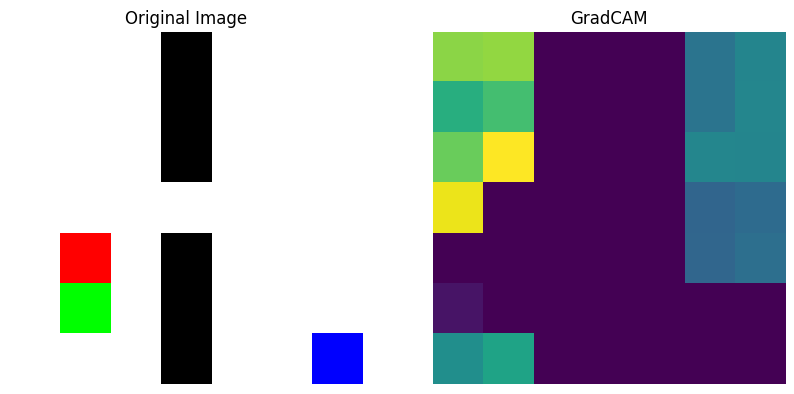

Layer: 3
Action: Up


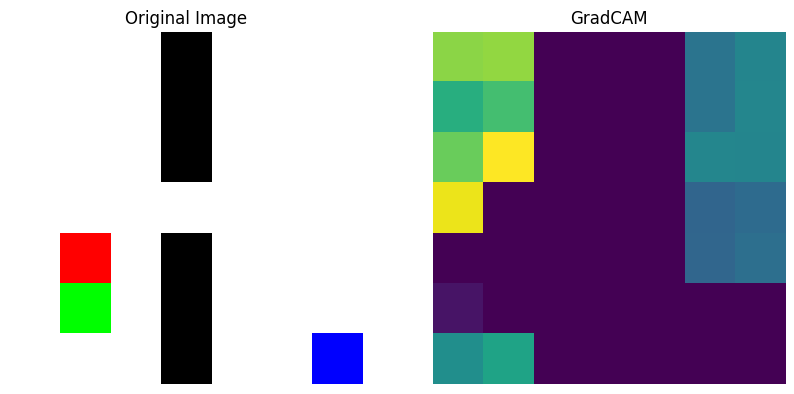

In [132]:
agent.load_model_weights(f"C:/Projects/public/XAI_Master/models/y_r10_g03_3000k.pth")

action_to_direction = {0: 'Right', 1: 'Down', 2: 'Left', 3: 'Up'}

state = torch.tensor(state_init, dtype=torch.float32, device=agent.device).unsqueeze(0)
actions = agent.predict(state)

layers = (agent.policy_net.conv1, agent.policy_net.conv2, agent.policy_net.conv3)
for layer, counter in zip(layers, range(len(layers))):
    print(f"Layer: {counter+1}")

    target_layer = agent.policy_net.conv3
    action_idx = torch.argmax(actions, dim=1).item()
    targets = [ClassifierOutputTarget(action_idx)]
    print(f"Action: {action_to_direction[action_idx]}")

    with GradCAM(model=agent.policy_net, target_layers=[target_layer]) as cam:
        grayscale_cam = cam(input_tensor=state, targets=targets)
        grayscale_cam = grayscale_cam[0, :]#only one image in the batch
        original_img = state[0].permute(2, 1, 0).cpu().numpy()
        grayscale_cam = grayscale_cam.transpose(1, 0)

        # You can also get the model outputs without redoing inference
        #model_outputs = cam.outputs
        #print(f"Model outputs: {model_outputs}")

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img, interpolation='nearest')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(grayscale_cam, interpolation=None)
    plt.title("GradCAM")
    plt.axis('off')
    plt.show()

    #print(grayscale_cam)